# 18.330 Midterm exam -- Example solutions

In [1]:
using PyPlot
PyPlot.svg(true);

## Question 1.

### (a)

This is the trapezoid rule

### (b)

The sketch should be a straight line with slope -2, the trapezoid rule converges like $\mathcal{O}(N^{-2})$

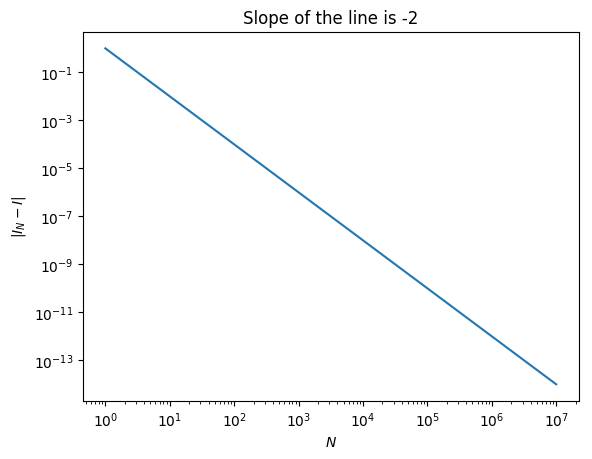

PyObject Text(0.5, 1.0, 'Slope of the line is -2')

In [2]:
Ns = 10.0.^(0:7)

figure()
loglog(Ns, Ns.^-2)

xlabel(L"N")
ylabel(L"|I_N - I|")
title("Slope of the line is -2")

### (c)
 For $N=1$, the trapezoid rule is
 $$
 I_1 = \frac{\Delta}{2}f(a) + \frac{\Delta}{2} f(b), \quad \Delta = b - a.
 $$
 
Because integrals are linear, it is enough to consider the monomials.

$$
I(1) = \int_a^b 1 dx = b-a
$$

and 
$$
I_1(1) = (b - a) \frac{1}{2} + (b-a) \frac{1}{2} = b - a,
$$

so constants are integrated exactly.

$$
I(x) = \int_a^b x dx = \frac{1}{2}(b^2-a^2)
$$

and 
$$
I_1(x) = (b - a) \frac{1}{2} a + (b-a) \frac{1}{2} b = \frac{1}{2}(b^2 - a^2),
$$

so linear polynomials are integrated exactly.

$$
I(x^2) = \int_a^b x^2 dx = \frac{1}{3}(b^3-a^3)
$$

and 
$$
I_1(x^2) = (b - a) \frac{1}{2} a^2 + (b-a) \frac{1}{2} b^2 = \frac{1}{2}(b^3 + b a^2 - a b^2 - a^3),
$$

so quadratic polynomials are not integrated exactly.
Therefore, $k^* = 1$.

## Question 2.

### (a)
Using LU decomposition we write

$$
A\mathbf{x} = \mathbf{b} \Leftrightarrow LU \mathbf{x} = \mathbf{b}.
$$

This can be written as two systems
$$
L\mathbf{y} = \mathbf{b}, \quad U\mathbf{x} = \mathbf{y}.
$$
The first one is solved numerically by forward substitution, the second one by backsubstitution.

### (b)
\begin{align*}
\begin{pmatrix}
   {b_1} & {c_1} & {   } & {   } & { 0 } \\
   {a_2} & {b_2} & {c_2} & {   } & {   } \\
   {   } & {a_3} & {b_3} & \ddots & {   } \\
   {   } & {   } & \ddots & \ddots & {c_{n-1}}\\
   { 0 } & {   } & {   } & {a_n} & {b_n}\\
\end{pmatrix}
\begin{pmatrix}
   {x_1 }  \\
   {x_2 }  \\
   {x_3 }  \\
   \vdots   \\
   {x_n }  \\
\end{pmatrix}
=
\begin{pmatrix}
   {d_1 }  \\
   {d_2 }  \\
   {d_3 }  \\
   \vdots   \\
   {d_n }  \\
\end{pmatrix},
\end{align*}

First, divide the first row by $b_1$:
\begin{align*}
\begin{pmatrix}
   {1} & {c_1/b_1} & {   } & {   } & { 0 } \\
   {a_2} & {b_2} & {c_2} & {   } & {   } \\
   {   } & {a_3} & {b_3} & \ddots & {   } \\
   {   } & {   } & \ddots & \ddots & {c_{n-1}}\\
   { 0 } & {   } & {   } & {a_n} & {b_n}\\
\end{pmatrix}
\begin{pmatrix}
   {x_1 }  \\
   {x_2 }  \\
   {x_3 }  \\
   \vdots   \\
   {x_n }  \\
\end{pmatrix}
=
\begin{pmatrix}
   {d_1/b_1 }  \\
   {d_2 }  \\
   {d_3 }  \\
   \vdots   \\
   {d_n }  \\
\end{pmatrix}.
\end{align*}

Then, subtract $a_2$ times the first row from the second:
\begin{align*}
\begin{pmatrix}
   {1} & {c_1/b_1} & {   } & {   } & { 0 } \\
   {0} & {b_2 - a_2 c_1/b_1} & {c_2} & {   } & {   } \\
   {   } & {a_3} & {b_3} & \ddots & {   } \\
   {   } & {   } & \ddots & \ddots & {c_{n-1}}\\
   { 0 } & {   } & {   } & {a_n} & {b_n}\\
\end{pmatrix}
\begin{pmatrix}
   {x_1 }  \\
   {x_2 }  \\
   {x_3 }  \\
   \vdots   \\
   {x_n }  \\
\end{pmatrix}
=
\begin{pmatrix}
   {d_1/b_1 }  \\
   {d_2 - a_2 d_1/b_1 }  \\
   {d_3 }  \\
   \vdots   \\
   {d_n }  \\
\end{pmatrix}.
\end{align*}


We can read off the formulas for the coefficients:
\begin{align}
c_1' &= c_1/b_1 \\
d_1' &= d_1/b_1 \\
b_2' &= b_2 - a_1 \underbrace{c_1/b_1}_{=c_1'} \\
c_2' &= c_2 \\
d_2' &= d_2 - a_1 \underbrace{d_1/b_1}_{=d_1'}.
\end{align}

Computing $c_1'$: 1 division, $d_1'$: 1 division, $b_2'$: 1 subtraction, 1 multiplication (if we reuse the value of $c_1'$, otherwise add 1 multiplication and one division),
$c_2'$: 0 operations, $d_2'$: 1 subtraction, 1 multiplication (if we reuse the value of $d_1'$, otherwise add 1 multiplication and one division).

The most efficient case requires 6 operations in total.

To eliminate all the $a_i$'s and set the $b_i$'s to $1$, we realize that we can repeat the same operations
$n-1$ times until we arrive at
$$
\begin{align*}
\begin{pmatrix}
   {1} & {c_1'} & {   } & {   } & { 0 } \\
   {0} & {1} & {c_2'} & {   } & {   } \\
   {   } & {0} & {1} & \ddots & {   } \\
   {   } & {   } & \ddots & \ddots & {c_{n-1}'}\\
   { 0 } & {   } & {   } & {0} & {b_n'}\\
\end{pmatrix}
\begin{pmatrix}
   {x_1 }  \\
   {x_2 }  \\
   {x_3 }  \\
   \vdots   \\
   {x_n }  \\
\end{pmatrix}
=
\begin{pmatrix}
   {d_1' }  \\
   {d_2' }  \\
   {d_3' }  \\
   \vdots   \\
   {d_n' }  \\
\end{pmatrix},
\end{align*}  
$$

This took $6(n-1)$ operations. One final division is required to normalize the last row, so in total
the number of operations required is
$$
N_{ops} = 6(n-1) + 1 = 6n - 5.
$$

### (c)
Backsubstitution yields

\begin{align}
x_n &= d_n'' \\
x_{n-1} &= d_{n-1}' - c_{n-1}' x_n \\
\vdots \\
x_{1} &= d_{1}' - c_{1}' x_n.
\end{align}

The first equation is solved for free, the $n-1$ others take 1 multiplication and one subtraction each,
so $2(n-1)$ operations in total.

Therefore, solving a tridiagonal system takes $8n-7= \mathcal{O}(n)$ operations.

## Question 3.

### (a)

(i) Euler method: $y_{n+1} = y_n - h\lambda y_n $

(ii) Improved Euler method: $y_{n+1} = y_n - h\lambda y_n + \frac{(h\lambda)^2}{2} y_n$

### (b)
(i) Convergence of the method to zero if $|1 - h\lambda| < 1$.

First condition: $1 - h \lambda < 1 \Rightarrow h >0$, which is true by definition.

Second condition: $1 - h\lambda > -1 \Rightarrow h < 2/\lambda$.

(ii) Convergence of the method to zero if $|1 - h\lambda + \frac{(h\lambda)^2}{2}| < 1$.

First condition: $1 - h\lambda + \frac{(h\lambda)^2}{2} < 1 \Rightarrow h < 2/\lambda$.

Second condition:$ 1 - h\lambda + \frac{(h\lambda)^2}{2} > -1 \Leftrightarrow (h\lambda - 1)^2 > -3$, which is always true. So, the only condition is $h < 2/\lambda$, just like for the Euler method.

## Question 4.

We consider $f(x,y) = x^2 + xy - y^2 +y^4$.

Extrema are defined by the gradient condition $\nabla f(x,y) = 0$.
We compute

$$
\nabla f(x,y) = \begin{pmatrix}
2x + y \\
x - 2y + 4y^3
\end{pmatrix}
$$

In order to use Newton's method we need the Jacobian matrix of this gradient.
This is the Hessian of $f$:

$$
H_f(x,y) = \begin{pmatrix}
2 & 1 \\
1 & -2 + 12y^2
\end{pmatrix}.
$$

In [3]:
function find_minimum(x0, N)
    grad_f(x) = [2x[1] + x[2]
                 x[1] - 2x[2] + 4x[2]^3]
    hess_f(x) = [2      1
                 1      (-2+12x[2]^2)]
    
    x = x0
    for i=1:N
        x = x - hess_f(x) \ grad_f(x)
    end
    
    return x
end

find_minimum (generic function with 1 method)

In [4]:
find_minimum([0.5, 2.2], 15)

2-element Array{Float64,1}:
 -0.3952847075210474
  0.7905694150420948

We expect quadratic convergence. This means that near a true minimum, for the error $\varepsilon_n = \| \mathbf{x}_n - \mathbf{x}^* \|$ we have $\varepsilon_{n+1} \sim \varepsilon_{n}^2$.

## Question 5.

### (a) 
We have
$$
F_{\nu n} = \frac{1}{\sqrt{N}} e^{-2\pi i \frac{\nu n}{N}}
$$

The elements of the matrix product are:

$$
(F^H F)_{nm} = \sum_{\nu=0}^{N-1} \frac{1}{\sqrt{N}} e^{2\pi i \frac{\nu n}{N}} \frac{1}{\sqrt{N}} e^{-2\pi i \frac{\nu m}{N}} = \frac{1}{N}\sum_{\nu=0}^{N-1}  e^{2\pi i \frac{\nu (n-m)}{N}}
$$

On the diagonal, $n=m$ and the sum runs over all 1's:

$$
(F^H F)_{nn} = \frac{1}{N} \sum_{\nu=0}^{N-1} 1 = 1.
$$

For the other elements, we recognize a geometric series:

$$
(F^H F)_{nm} = \frac{1}{N} \sum_{\nu=0}^{N-1} \left(\underbrace{e^{2\pi i \frac{(n-m)}{N}}}_{=\zeta}\right)^\nu
= \frac{1}{N} \frac{1 - \zeta^N}{1 - \zeta}.
$$

But $\zeta^N = e^{2\pi i (n-m)} = 1$, so the sum is zero. This proves that $F^H F$ is the identity matrix.

### (b)

With the given definition of the inner product we calculate
$$
\langle \hat{\mathbf{f}}, \hat{\mathbf{g}} \rangle = \langle F \mathbf{f}, F \mathbf{g} \rangle
= \langle \mathbf{f}, \underbrace{F^H F}_{=\mathbb{1}} \mathbf{g} \rangle = \langle \mathbf{f},\mathbf{g}\rangle,
$$

which proves the discrete Parseval theorem.